**Task 2:** Explore Unsupervised Machine Learning 




From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# loading the iris dataset from the scikit-learn library
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
# printing the description of the data set
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The imported data set 'iris' is not a dataframe but it is a dictonary. We firstly convert it to a pandas dataframe, without the target column.

In [ ]:
# creating a pandas DataFrame with the imported iris data
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Features os the dataset.Heatmap on the correlation table of the dataframe.

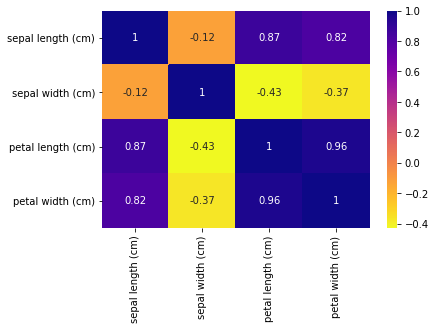

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='plasma_r')
plt.show()

Clearly, the petal length and petal width features have the strongest positive correlation in all three species. And sepal length also is positively correlated to petal length and petal width. However, sepal width has a negative correlation with all other features.

 K-Means clustering algorithm.



In [ ]:
# importing the necessary function
from sklearn.cluster import KMeans

Using Elbow method

In [ ]:
wcss = []  # wcss corresponds to: within cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

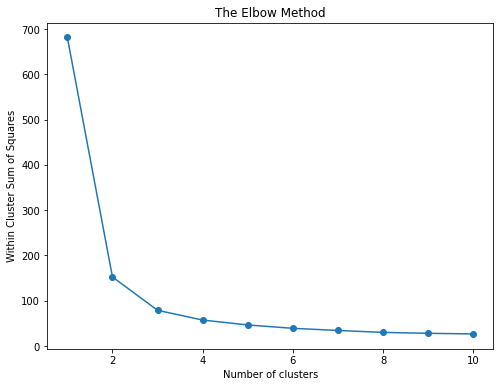

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares') 
plt.show()

It can be clearly seen from the above graph the optimum clusters is where the elbow occurs. 

From this we choose the optimum  number of clusters as **3**.

In [ ]:
# Applying kmeans to the dataset and creating the model
kmeans = KMeans(n_clusters = 3, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

### Visualizing the clusters
visualization of created clusters and their centroids

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

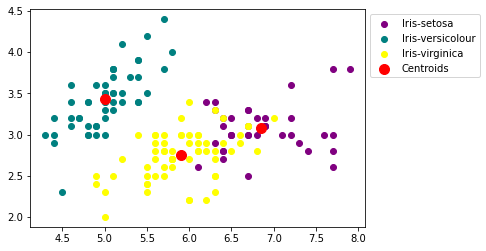

In [ ]:
plt.scatter(df[y_kmeans == 0]['sepal length (cm)'], df[y_kmeans == 0]['sepal width (cm)'], 
            c = 'purple', label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 1]['sepal length (cm)'], df[y_kmeans == 1]['sepal width (cm)'], 
            c = 'teal', label = 'Iris-versicolour')
plt.scatter(df[y_kmeans == 2]['sepal length (cm)'], df[y_kmeans == 2]['sepal width (cm)'],
         c = 'yellow', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

We can see the 3 clusters created and the centroids of each. 



**Thus,From the given ‘Iris’ dataset, we predict the optimum number of clusters and represented it visually.**